In [1]:
import pandas as pd
from ReliefF import ReliefF as rlf
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [24]:
data_cat = pd.read_csv("/Users/louisedry/Desktop/IODAA/fil_rouge/git/fil_rouge/data_pretraitee/data_categorielle.csv", sep=";", index_col=0)
data_mix = pd.read_csv("/Users/louisedry/Desktop/IODAA/fil_rouge/git/fil_rouge/data_pretraitee/data_pretraite.csv", sep=";", index_col=0)

In [26]:
data_cat.columns

Index(['N2O', 'Date', 'Bande', 'CP', 'Peuplement', 'Travail_sol_J90',
       'Ajout_phyto_30J', 'Ajout_ferti_30J', 'N2O_O3', 'N2O_J45', 'N2O_J182',
       'Temp_moyenne_5J', 'Sum_pluie_5J', 'year', 'month', 'Temp_quali',
       'Pluie_quali', 'Pluie_ON', 'Saison', 'Pic_O3', 'Pic_J45', 'Pic_J182'],
      dtype='object')

In [27]:
target_O3 = data_cat['Pic_O3']
target_J45 = data_cat['Pic_J45']
target_J182 = data_cat['Pic_J182']

In [4]:
data_cat.columns

Index(['N2O', 'Date', 'Bande', 'CP', 'Peuplement', 'Travail_sol_J90',
       'Ajout_phyto_30J', 'Ajout_ferti_30J', 'N2O_O3', 'N2O_J45', 'N2O_J182',
       'Temp_moyenne_5J', 'Sum_pluie_5J', 'year', 'month', 'Temp_quali',
       'Pluie_quali', 'Pluie_ON', 'Saison', 'Pic_O3', 'Pic_J45', 'Pic_J182'],
      dtype='object')

In [28]:
data_cat["Travail_sol_J90"] = data_cat["Travail_sol_J90"].astype("float64")

In [6]:
data_fullcat = data_cat.drop(["Pic_O3","Pic_J45","Pic_J182","N2O","Date","N2O_O3","N2O_J45","N2O_J182","Sum_pluie_5J","Temp_moyenne_5J"], axis=1)

In [7]:
data_fullcat.columns

Index(['Bande', 'CP', 'Peuplement', 'Travail_sol_J90', 'Ajout_phyto_30J',
       'Ajout_ferti_30J', 'year', 'month', 'Temp_quali', 'Pluie_quali',
       'Pluie_ON', 'Saison'],
      dtype='object')

#### Relief

In [8]:
ohe = OneHotEncoder(sparse=False)
data = ohe.fit_transform(data_fullcat)

In [9]:
data.shape

(373, 61)

In [10]:
relief = rlf(n_neighbors=1, n_features_to_keep=5)

relief_O3 = relief.fit_transform(data, target_O3)
relief_J45 = relief.fit_transform(data, target_J45)
relief_J182 = relief.fit_transform(data, target_J182)

print(data_cat.shape)
print(data.shape)

(373, 22)
(373, 61)


In [11]:
relief_J182

array([[1., 1., 0., 0., 0.],
       [1., 1., 0., 0., 0.],
       [1., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

SFS

In [30]:
data_cat.columns

Index(['N2O', 'Date', 'Bande', 'CP', 'Peuplement', 'Travail_sol_J90',
       'Ajout_phyto_30J', 'Ajout_ferti_30J', 'N2O_O3', 'N2O_J45', 'N2O_J182',
       'Temp_moyenne_5J', 'Sum_pluie_5J', 'year', 'month', 'Temp_quali',
       'Pluie_quali', 'Pluie_ON', 'Saison', 'Pic_O3', 'Pic_J45', 'Pic_J182'],
      dtype='object')

In [31]:
data_cat = data_cat.drop(["Pic_O3","Pic_J45","Pic_J182","N2O","Date","N2O_O3","N2O_J45","N2O_J182","Pluie_ON"], axis=1)

In [32]:
dummy_data = pd.get_dummies(data_cat)

In [33]:
dummy_data

,Travail_sol_J90,Ajout_phyto_30J,Ajout_ferti_30J,Temp_moyenne_5J,Sum_pluie_5J,year,month,Bande_acs,Bande_bi,Bande_bio,...,Temp_quali_basse,Temp_quali_elevee,Temp_quali_moyenne,Pluie_quali_basse,Pluie_quali_elevee,Pluie_quali_moyenne,Saison_automne,Saison_ete,Saison_hiver,Saison_printemps
0,0.0,0.0,1.0,10.54,28.0,2018,3,1,0,0,...,0,0,1,0,1,0,0,0,1,0
1,0.0,0.0,1.0,10.54,28.0,2018,3,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,0.0,0.0,0.0,10.54,28.0,2018,3,0,1,0,...,0,0,1,0,1,0,0,0,1,0
3,0.0,0.0,1.0,10.54,28.0,2018,3,0,0,1,...,0,0,1,0,1,0,0,0,1,0
4,0.0,0.0,0.0,10.54,28.0,2018,3,0,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,0.0,0.0,0.0,18.00,9.0,2021,7,0,0,0,...,0,1,0,0,1,0,0,1,0,0
369,1.0,0.0,0.0,19.70,12.0,2019,8,0,0,0,...,0,1,0,0,1,0,0,1,0,0
370,1.0,0.0,0.0,19.70,12.0,2019,8,0,0,0,...,0,1,0,0,1,0,0,1,0,0
371,1.0,1.0,0.0,15.26,0.0,2019,9,0,0,0,...,0,0,1,1,0,0,0,1,0,0


In [14]:
rf = RandomForestClassifier(n_estimators=200)
sfs = SequentialFeatureSelector(rf, n_features_to_select=5)

sfs.fit(dummy_data, target_O3)

SequentialFeatureSelector(estimator=RandomForestClassifier(n_estimators=200),
                          n_features_to_select=5)

In [15]:
data_new = sfs.transform(dummy_data)
print(data_new.shape)

(373, 5)


In [16]:
dummy_data.loc[:,sfs.get_support()]

,month,Peuplement_inter-cultures,Peuplement_orge_de_printemps,Pluie_ON_pas_pluie,Saison_hiver
0,3,0,0,0,1
1,3,0,0,0,1
2,3,0,0,0,1
3,3,0,0,0,1
4,3,0,0,0,1
...,...,...,...,...,...
368,7,0,0,0,0
369,8,0,0,0,0
370,8,0,0,0,0
371,9,0,0,0,0


XGBoost avec feature importance

<AxesSubplot: >

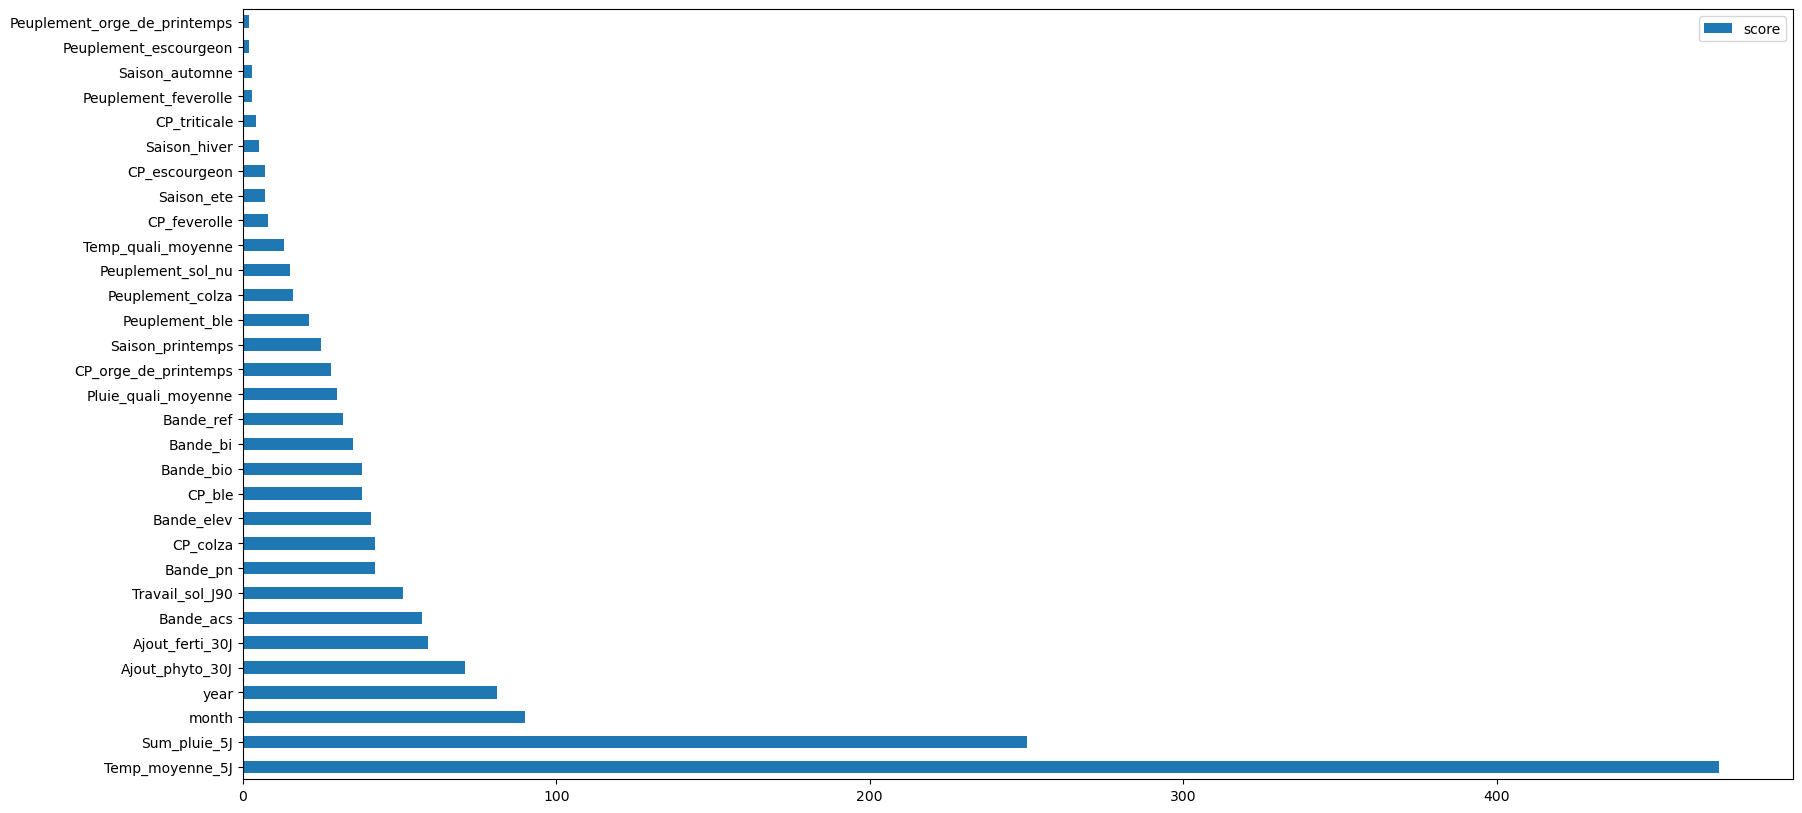

In [34]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

xgb.fit(dummy_data, target_O3)
feature_important = xgb.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())
data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(40, columns="score").plot(kind='barh', figsize = (20,10))

<AxesSubplot: >

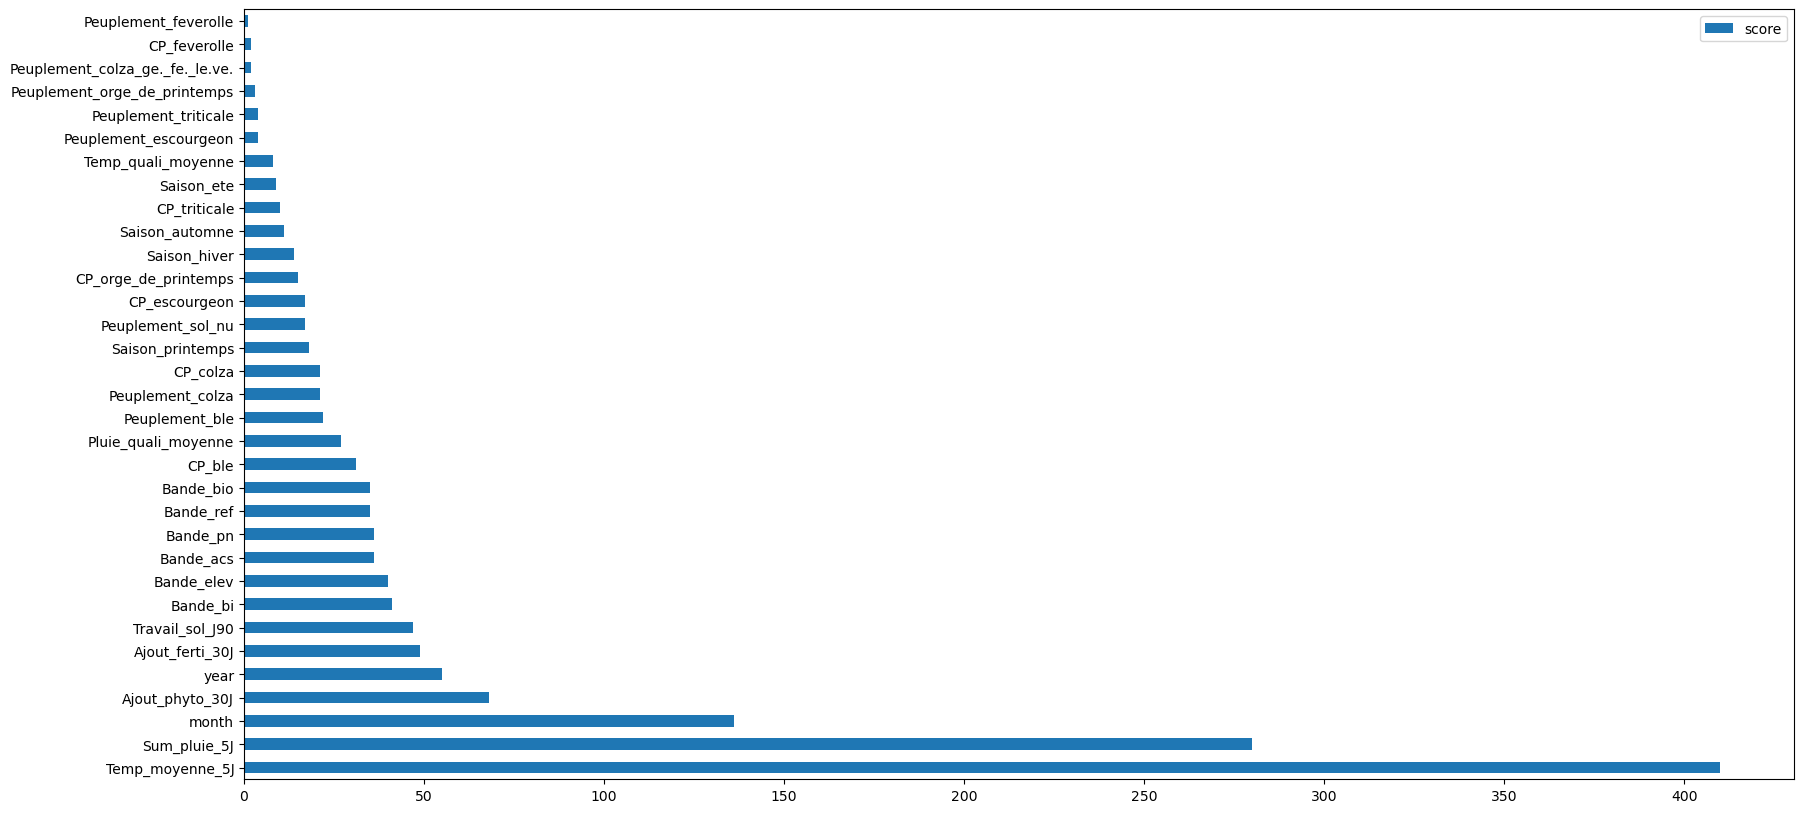

In [35]:
xgb.fit(dummy_data, target_J45)
feature_important = xgb.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())
data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(40, columns="score").plot(kind='barh', figsize = (20,10))

<AxesSubplot: >

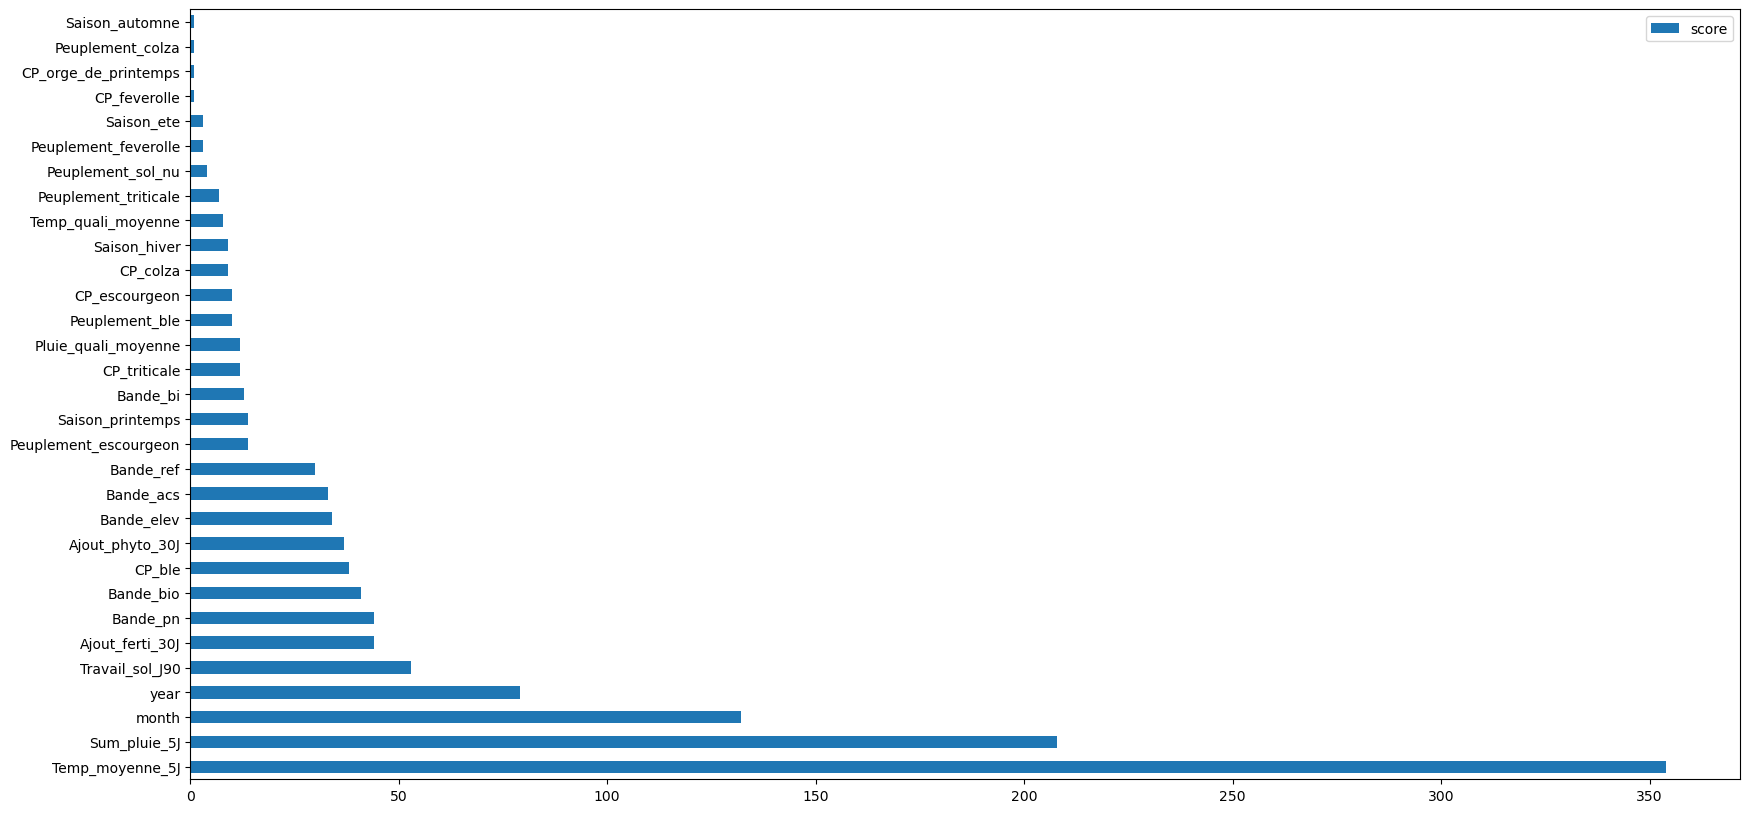

In [36]:
xgb.fit(dummy_data, target_J182)
feature_important = xgb.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())
data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(40, columns="score").plot(kind='barh', figsize = (20,10))